In [1]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn import tree

In [2]:
data = {
    'StudyHours': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'PrevExamScore': [30, 40, 45, 50, 60, 65, 70, 75, 80, 85],
    'Pass': [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]  # 0 = Fail, 1 = Pass
}

df = pd.DataFrame(data)
print(df.head())

   StudyHours  PrevExamScore  Pass
0           1             30     0
1           2             40     0
2           3             45     0
3           4             50     0
4           5             60     0


In [3]:
X = df[['StudyHours', 'PrevExamScore']]  # Features
y = df['Pass']  # Target variable (0 = Fail, 1 = Pass)

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data: {X_train.shape}, {y_train.shape}")
print(f"Testing data: {X_test.shape}, {y_test.shape}")

Training data: (8, 2), (8,)
Testing data: (2, 2), (2,)


In [4]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Make predictions using the test set
y_pred_logreg = logreg_model.predict(X_test)

# Evaluate the Logistic Regression model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg}")

Logistic Regression Accuracy: 1.0


In [5]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Make predictions using the test set
y_pred_tree = tree_model.predict(X_test)

# Evaluate the Decision Tree model
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Decision Tree Accuracy: {accuracy_tree}")

Decision Tree Accuracy: 1.0


In [6]:
# Evaluate Logistic Regression
print("Logistic Regression:")
print(f"Accuracy: {accuracy_logreg}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))
print("Classification Report:")
print(classification_report(y_test, y_pred_logreg))

# Evaluate Decision Tree
print("Decision Tree:")
print(f"Accuracy: {accuracy_tree}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tree))
print("Classification Report:")
print(classification_report(y_test, y_pred_tree))

Logistic Regression:
Accuracy: 1.0
Confusion Matrix:
[[1 0]
 [0 1]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Decision Tree:
Accuracy: 1.0
Confusion Matrix:
[[1 0]
 [0 1]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



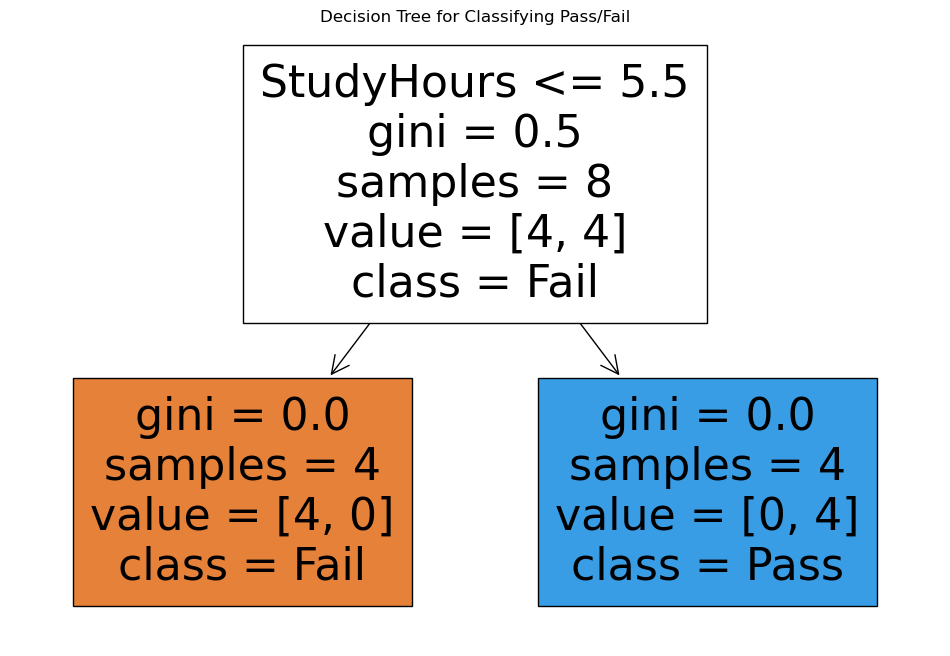

In [7]:
plt.figure(figsize=(12,8))
tree.plot_tree(tree_model, feature_names=['StudyHours', 'PrevExamScore'], class_names=['Fail', 'Pass'], filled=True)
plt.title('Decision Tree for Classifying Pass/Fail')
plt.show()